In [1]:
#n_components降维后所需的维度:人为确定的参数
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
iris = load_iris()
y = iris.target
x = iris.data

In [2]:
x.shape

(150, 4)

In [3]:
pd.DataFrame(x)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
##调用pca
pca = PCA(n_components = 2)
pca = pca.fit (x)
X_dr = pca.transform(x)
X_dr
#X_dr = PCA(n_components = 2).fit_transform(x)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [5]:
##在二维坐标系中对应的两个坐标(pca1,pca2)作为特征画出鸢尾花的数据
X_dr[y == 0, 0] #第一种花的pca1
X_dr[y == 0, 1] #第一种花的pca2
X_dr[y == 1, 1] #第二种花的pca2

array([ 0.68516047,  0.31833364,  0.50426282, -0.82795901,  0.07459068,
       -0.41824687,  0.28346827, -1.00489096,  0.2283619 , -0.72308191,
       -1.26597119, -0.10398124, -0.55003646, -0.12481785, -0.25485421,
        0.46717949, -0.35296967, -0.33361077, -0.54314555, -0.58383438,
       -0.08461685, -0.06892503, -0.32778731, -0.18273779,  0.14905594,
        0.32850447,  0.24444088,  0.26749545, -0.1633503 , -0.36826219,
       -0.70517213, -0.68028676, -0.31403244, -0.42095429, -0.48428742,
        0.19418231,  0.40761959, -0.37203706, -0.2685244 , -0.68192672,
       -0.67071154, -0.03446444, -0.40438585, -1.01224823, -0.50491009,
       -0.21265468, -0.29321893,  0.01773819, -0.75609337, -0.34889781])

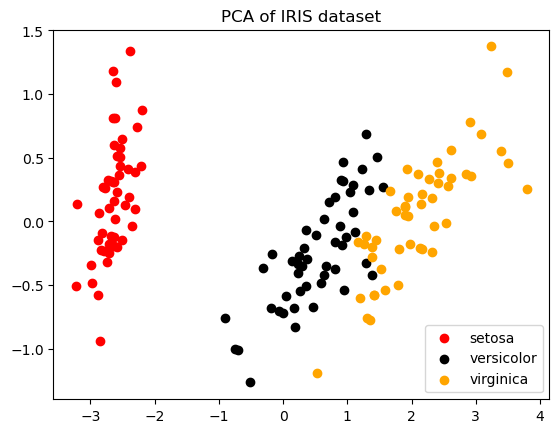

In [6]:
plt.figure()
plt.scatter(X_dr[y == 0, 0],X_dr[y == 0, 1],c = "red", label=iris.target_names[0])
plt.scatter(X_dr[y == 1, 0],X_dr[y == 1, 1],c = "black", label=iris.target_names[1])
plt.scatter(X_dr[y == 2, 0],X_dr[y == 2, 1],c = "orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

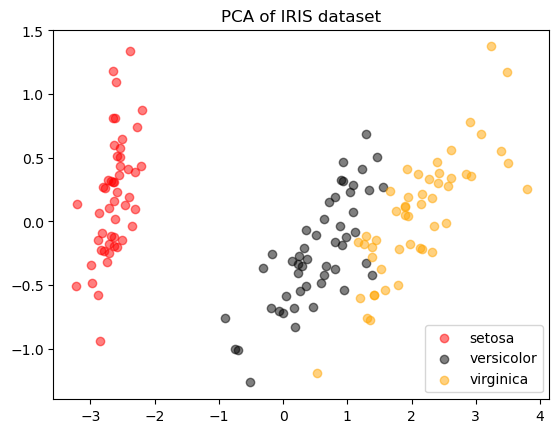

In [7]:
#for loop平替
colors = ['red','black','orange']
plt.figure()
for i in [0,1,2]:
    plt.scatter(X_dr[y == i, 0],
                X_dr[y == i, 1],
                alpha = .5,
                c = colors[i],
                label = iris.target_names[i]
               )

plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [8]:
#降维后每个新特征向量的信息量(可解释方差)大小
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
#降维后每个新特征向量的信息量(可解释方差)贡献率
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [10]:
#降维后所有新特征向量的信息量之和
pca.explained_variance_ratio_.sum()

0.9776852063187949

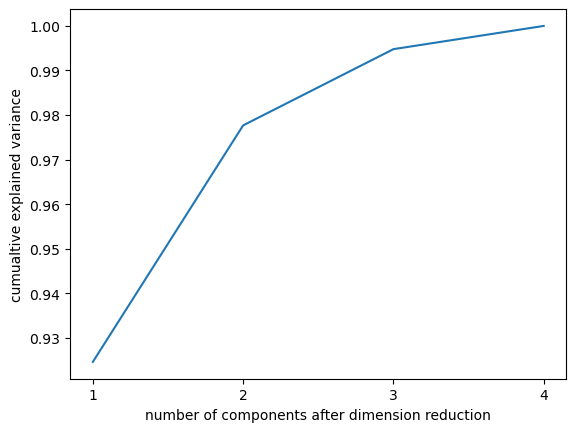

In [11]:
#调参:选择最好的n_components
import numpy as np
pca_line = PCA().fit(x)
plt.plot ([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumualtive explained variance")
plt.show()

In [12]:
#最大似然估计自选超参数(n_components)
pca_mle = PCA(n_components = "mle")
pca_mle = pca_mle.fit(x)
x_mle = pca_mle.transform(x)
print(x_mle.shape) #3列特征为最好的取值

(150, 3)


In [13]:
#用最终保留的信息量选择超参数(n_components)
pca_info = PCA(n_components = 0.97, svd_solver = "full")
pca_info = pca_info.fit(x)
X_info = pca_info.transform(x)

pca_info.explained_variance_ratio_.sum()

0.9776852063187949

In [19]:
#输出SVD计算过程的矩阵V(k,n)
PCA(n_components = 2).fit(x).components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [20]:
PCA(n_components = 2).fit(x).components_.shape #k=2,n=4

(2, 4)

In [33]:
########################人脸识别###############################
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [25]:
faces = fetch_lfw_people(min_faces_per_person = 60)
faces

{'data': array([[0.53333336, 0.52418303, 0.49673203, ..., 0.00653595, 0.00653595,
         0.00130719],
        [0.28627452, 0.20784314, 0.2535948 , ..., 0.96993464, 0.95032686,
         0.9346406 ],
        [0.31633988, 0.3895425 , 0.275817  , ..., 0.4261438 , 0.7895425 ,
         0.9555555 ],
        ...,
        [0.11633987, 0.11111111, 0.10196079, ..., 0.5660131 , 0.579085  ,
         0.5542484 ],
        [0.19346406, 0.21045752, 0.29150328, ..., 0.6875817 , 0.6575164 ,
         0.5908497 ],
        [0.12418301, 0.09673203, 0.10849673, ..., 0.12941177, 0.16209151,
         0.29150328]], dtype=float32),
 'images': array([[[0.53333336, 0.52418303, 0.49673203, ..., 0.2653595 ,
          0.2653595 , 0.26013073],
         [0.56993467, 0.545098  , 0.4797386 , ..., 0.2627451 ,
          0.2627451 , 0.26013073],
         [0.5882353 , 0.5398693 , 0.475817  , ..., 0.2640523 ,
          0.26013073, 0.25751635],
         ...,
         [0.59738564, 0.7176471 , 0.40261438, ..., 0.00653595,
     

In [31]:
faces.images.shape #矩阵中有1348个图像,62是每个图像特征矩阵的行,47是每个图像特征矩阵的列

(1348, 62, 47)

In [32]:
faces.data.shape #1348个数值,2914个特征(62*47)

(1348, 2914)

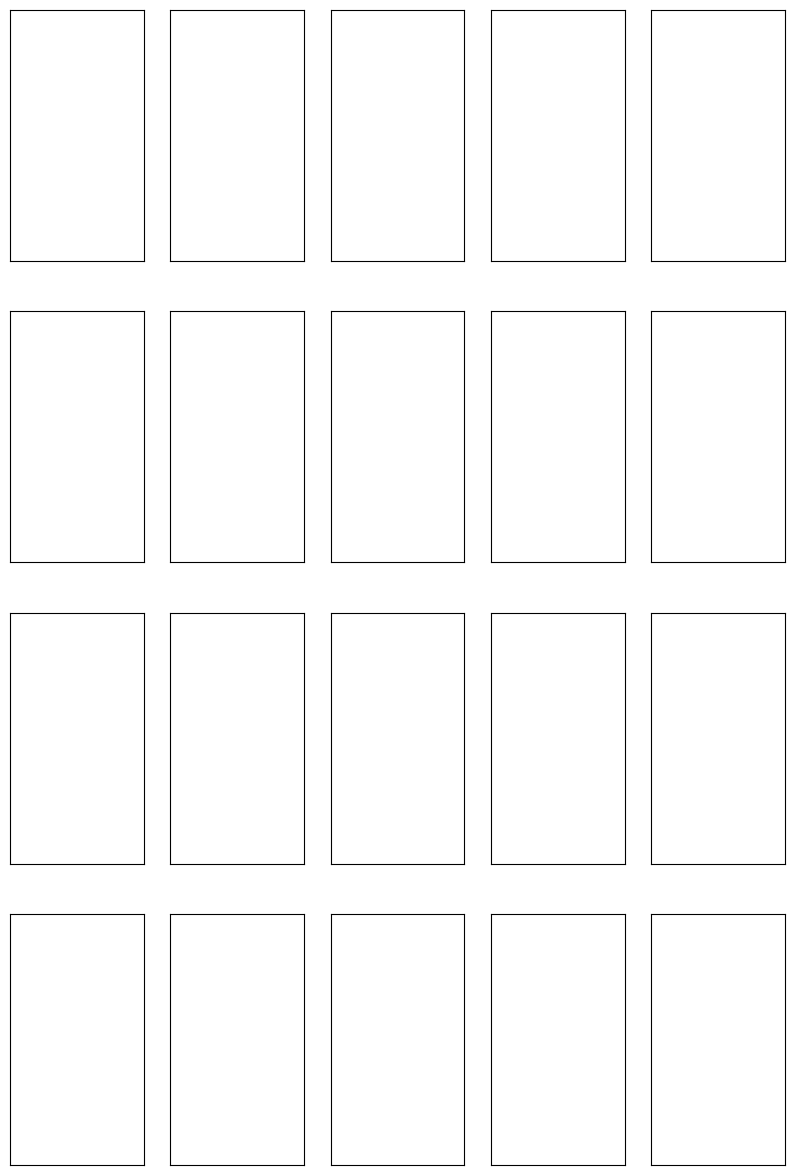

In [44]:
#画图
X = faces.data
fig,axes = plt.subplots(4,5,
                        figsize = (10,15)
                        ,subplot_kw = {"xticks":[],"yticks":[]}
                       )